In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

##### Supervised learning with scikit-learn
Machine learning: decisions from data without programmed, e.g. spam/not spam email

Unsupervised learning: uncovering hidden patterns from unlabelled data

Supervised learning: Predicted values are known
    - Classicifation: predict catagory
    - Regression: Target variable is continuous

Feature = predictor variable = independent variable
Target variable = dependent variable = response variable

Data requirements:
    - No missing values
    - Data in numeric format
    - Data in pandas or 

Scikit-learn pseudo-code syntax:
Import model, algorithm for our supervised learning problem from module

```from sklearn.module import Model```

```model = Model()```

```model.fit(X, y)```

```predictions = model.predict(X_new)```



Classifying labels of unseen data
1. Build a model
2. Model learns from labeled data passed to it
3. Pass unlabeled data to model as input
4. Model predicts the labels of unseen data (training data)

In [40]:
# Import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier 

from sklearn.datasets import load_iris
data = load_iris()
df = pd.DataFrame(data=data.data, 
                  columns=data.feature_names)
df['target'] = data.target

print(df.head())
# Create arrays for the features and the target variable
y = df["target"].values
X = df[["sepal length (cm)", "sepal length (cm)"]].values

# Create a KNN classifier with 6 neighbors
knn = KNeighborsClassifier(n_neighbors=6)

# Fit the classifier to the data
knn.fit(X, y)

# Observations for label predictions
X_new = np.array([[6.0,4.0],[1.0,2.0],[8.0,5.0]])

# Predict the labels for the X_new
y_pred = knn.predict(X_new)

# Print the predictions for X_new
print("Predictions: {}".format(y_pred))

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  
Predictions: [0 0 2]


### Measuring model performace
In classification, accuracy is a commonly used metric
$$\frac{\text{correct predicitons}}{\text{total observations}}$$

Split data into training set and testing set

```from sklearn.moedl_selection import train_test_split```

```X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=21,stratify=y)```
Where test_size is % of data for train set, random state seed for splitting data (reproducability), stratify=y



In [41]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=21, stratify=y)
knn.fit(X_train, y_train)
print(knn.score(X_test, y_test))

0.6444444444444445


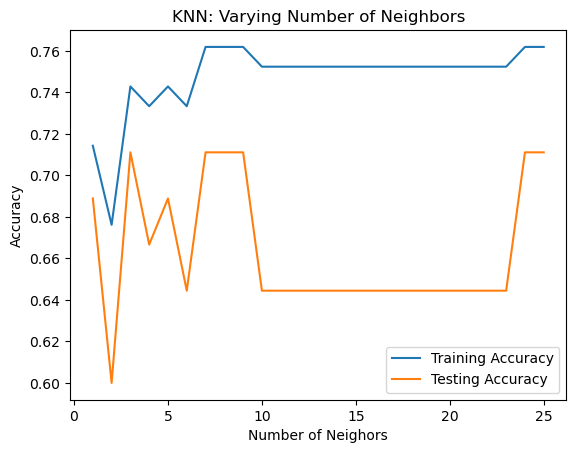

In [42]:
test_accuracies = {}
train_accuracies = {}
neighbors = np.arange(1,26)
for neighbor in neighbors:
    knn = KNeighborsClassifier(n_neighbors=neighbor)
    knn.fit(X_train, y_train)
    train_accuracies[neighbor] = knn.score(X_train, y_train)
    test_accuracies[neighbor] = knn.score(X_test, y_test)

plt.figure()
plt.title("KNN: Varying Number of Neighbors")
plt.plot(neighbors, train_accuracies.values(), label="Training Accuracy")
plt.plot(neighbors, test_accuracies.values(),label = "Testing Accuracy")
plt.legend()
plt.xlabel("Number of Neighors")
plt.ylabel("Accuracy")
plt.show()


#### Introduction to Regression
Continuous values...

Fit a line to data $y=ax+b$
Simple linear regression uses one feature
$a$, $b$ are the model coeffecients

Define an error function, choose a line that minimizes the error function

Error function = loss function = cost function

E.g. minimize vertical distance between point and line (a residual)

Residual sum of squares

Ordinary least squares

$$RSS = \sum_{i=1} ^{n} {(y_i - \hat{y}_i)^2}$$

Linear regression in higher dimensions (Multiple Regression)

$$y=a_1 x_1 + a_2 x_2 + b$$

Need to specify three variables $a_1 , a_2 , b$

$$R^2$$


In [43]:
from sklearn.datasets import load_diabetes
data = load_diabetes()
df = pd.DataFrame(data=data.data, 
                  columns=data.feature_names)
df['target'] = data.target

In [44]:
# convert feature and target variables to numpy arrays
X = df['bmi'].values
y = df['target'].values
X = X.reshape(-1,1) # reshape feature set to 2 dimensional array

[210.71003806 103.26219543 194.33703347 141.12476855 117.58857445]


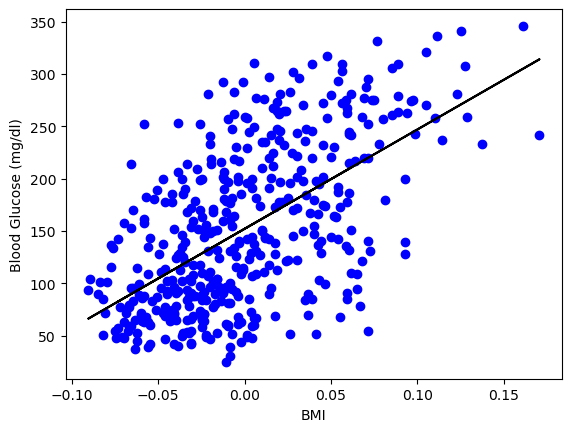

In [45]:
# Import LinearRegression
from sklearn.linear_model import LinearRegression

# Create the model
reg = LinearRegression()

# Fit the model to the data
reg.fit(X, y)

# Make predictions
predictions = reg.predict(X)

print(predictions[:5])

plt.scatter(X, y, color='blue')
plt.plot(X, predictions, color = 'black')
plt.ylabel('Blood Glucose (mg/dl)')
plt.xlabel('BMI')
plt.show()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 42)
reg_all = LinearRegression()
reg_all.fit(X_train, y_train)
